# 01 결정트리

## 결정트리(Decision Tree)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz

dt_clf = DecisionTreeClassifier(min_sampels_split=4, random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

TypeError: __init__() got an unexpected keyword argument 'min_sampels_split'

-----------------min_samples_split=4인 경우의 Decision Tree-----------------


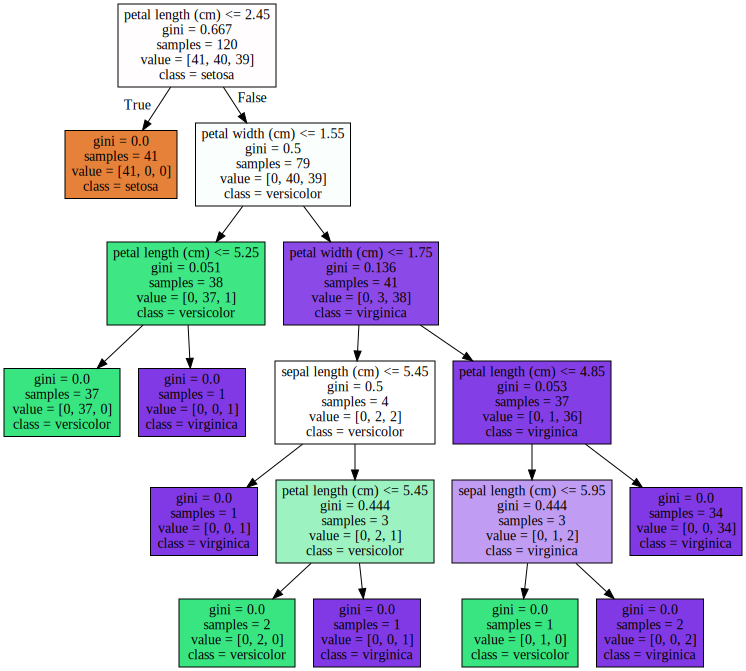

In [5]:
import graphviz

print('-----------------min_samples_split=4인 경우의 Decision Tree-----------------')

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

-----------------min_samples_leaf=4인 경우의 Decision Tree-----------------


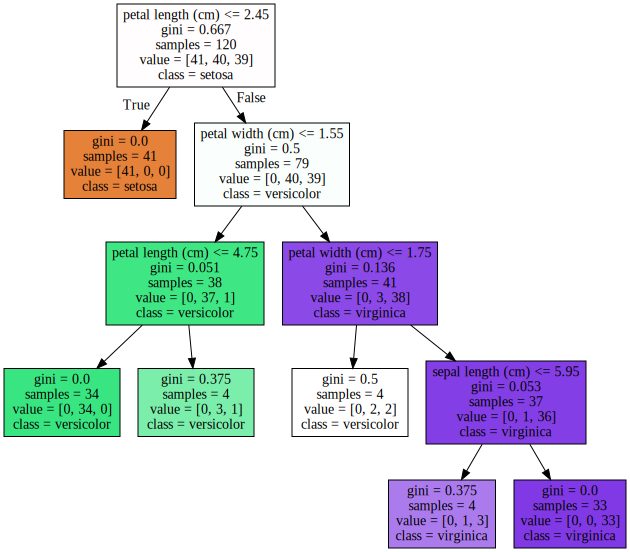

In [6]:
# DecisionTreeClassifier 생성; max_depth=3으로 제한
dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf.fit(X_train , y_train)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

print('-----------------min_samples_leaf=4인 경우의 Decision Tree-----------------')

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

-----------------min_samples_split=2인 경우의 Decision Tree-----------------


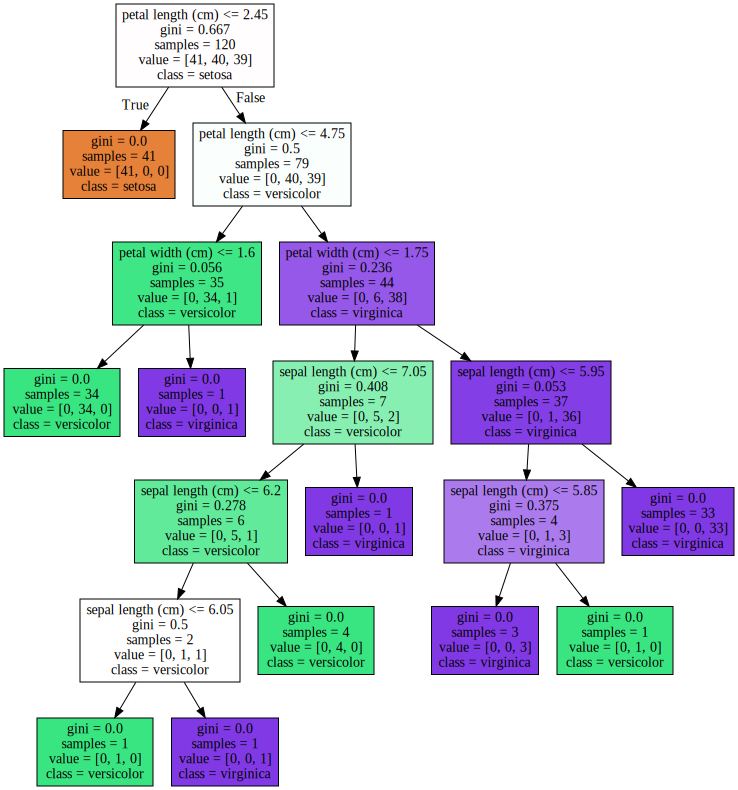

In [7]:
# DecisionTreeClassifier 생성; max_depth=2으로 제한
dt_clf = DecisionTreeClassifier(max_features=2, random_state=156)
dt_clf.fit(X_train , y_train)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

print('-----------------min_samples_split=2인 경우의 Decision Tree-----------------')

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 가지치기(pruning)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
data = pd.read_csv('C:/Users/USER/BITAmin/data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data.drop(columns=['Name', 'Ticket'], inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [18]:
# features와 label 분리
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]
y = data['Survived']

In [19]:
# 결측값 대체
X['Age'] = X['Age'].fillna(0)
X['Cabin'] = X['Cabin'].fillna('No')

In [20]:
# encoding 오류를 피하기 위해서
X['Embarked'] = str(X['Embarked'])

In [22]:
for col in X.columns:
    encoder = LabelEncoder()
    encoder.fit(X[col])
    X[col] = encoder.transform(X[col])
    
encoder = LabelEncoder()
encoder.fit(y)
y_label = encoder.transform(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train) # 객체 생성 및 학습
y_predicted = model.predict(X_test) # 예측

print('훈련 정확도:', model.score(X_train, y_train))
print('시험 정확도:', model.score(X_test, y_test))

훈련 정확도: 0.9903691813804173
시험 정확도: 0.7649253731343284


In [26]:
path = DecisionTreeClassifier(random_state=1).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [27]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

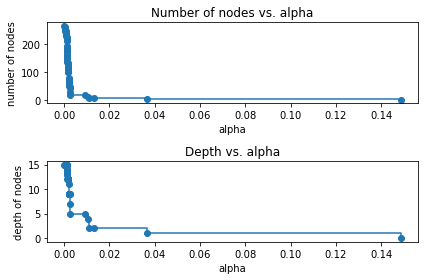

In [28]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1)

ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title('Number of nodes vs. alpha')

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of nodes')
ax[1].set_title('Depth vs. alpha')

fig.tight_layout()

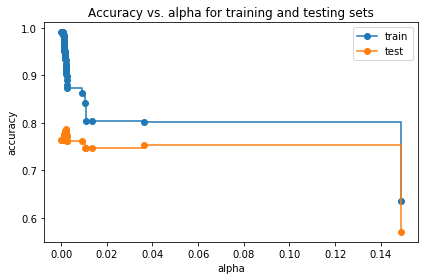

In [29]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs. alpha for training and testing sets')

ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()

fig.tight_layout()

In [30]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]

print('Training acuuracy of best model:', best_model.score(X_train, y_train))
print('Test acuuracy of best model:', best_model.score(X_test, y_test))

Training acuuracy of best model: 0.9229534510433387
Test acuuracy of best model: 0.7873134328358209


# 02 KNN

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd

In [35]:
breast_cancer = load_breast_cancer()
print(type(breast_cancer))

<class 'sklearn.utils.Bunch'>


## 스케일링 안 한 버전

In [36]:
X = breast_cancer['data']
y = breast_cancer['target']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [40]:
knn = KNeighborsRegressor()
param_grid = [{'n_neighbors': range(3,12)}]
knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': range(3, 12)}])

In [43]:
print('best hyper parameter:', knn_grid.best_params_)
print('best score: {0:.4f}'.format(knn_grid.best_score_))

best hyper parameter: {'n_neighbors': 11}
best score: 0.7755


## 스케일링 한 버전

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=40)

In [53]:
knn = KNeighborsRegressor()
param_grid = [{'n_neighbors': range(3,12)}]
knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': range(3, 12)}])

In [54]:
print('best hyper parameter:', knn_grid.best_params_)
print('best score: {0:.4f}'.format(knn_grid.best_score_))

best hyper parameter: {'n_neighbors': 3}
best score: 0.8771


# 03 SVM

## SVC

In [58]:
# SVC: 분류

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# 임의의 데이터 생성
X, y = make_blobs(n_samples=100, centers=2, random_state=20)
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

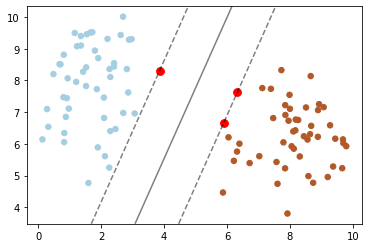

In [62]:
# 데이터 산점도
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

ax = plt.gca() # 현재 그림(위의 scatter plot) 받아옴
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# xx=xlim 처음부터 끝까지의 구간을 30등분하여 배열로 나타냄
xx = np.linspace(xlim[0], xlim[1], 30)

# yy=xlim 처음부터 끝까지의 구간을 30등분하여 배열로 나타냄
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx) # yy, xx로 각각 행단위, 열단위로 좌표행렬 만듦

# 좌표행렬을 1차원 배열로 만들고(ravel)
# -> 두 배열을 위에서 아래로 결합(1행이 XX.ravel(), 2행이 YY.ravel())
# -> 전치(T or transpose)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# 각 xy에 대한 decision값을 구해서 (900, ) 좌표계에 맞게 reshape
Z = clf.decision_function(xy).reshape(XX.shape)

# -1(파란), 0(결정경계), 1(갈색)에 따라 등차선 그림
ax.contour(XX, YY, Z, colors='k',
          levels = [-1,0,1],
          alpha = 0.5,
          linestyles = ['--', '-', '--'])

# 서포트 벡터 표현
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.datasets as data

%matplotlib inline
from sklearn.svm import SVC

# breast_cancer 데이터 로드
x = data.load_breast_cancer()
cancer = pd.DataFrame(data=x.data, columns=x.feature_names)
cancer['target'] = x.target
cancer.shape

(569, 31)

In [67]:
# 타겟변수 개수 확인
print(cancer.target.value_counts())
print('타겟 분포:', cancer.target.sum()/len(cancer.target))

1    357
0    212
Name: target, dtype: int64
타겟 분포: 0.6274165202108963


In [68]:
# 결측치 확인
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [70]:
from sklearn.model_selection import cross_val_score, cross_validate

# 데이터, 타겟 분리
x_data = cancer.iloc[:, :-1]
y_data = cancer.iloc[:, -1]

# 선형 분리모델
svc_linear = SVC(kernel='linear')

In [71]:
# 교차검증
scores = cross_val_score(svc_linear, x_data, y_data, cv=5)

print('검증 결과 점수:', scores)
print('검증 결과 점수 평균:', scores.mean())

검증 결과 점수: [0.94736842 0.92982456 0.97368421 0.92105263 0.95575221]
검증 결과 점수 평균: 0.9455364073901569


In [72]:
# 비선형 분리모델
svc_rbf = SVC(kernel='rbf', gamma='auto')

In [73]:
# 교차검증
scores = cross_val_score(svc_rbf, x_data, y_data, cv=5)

print('검증 결과 점수:', scores)
print('검증 결과 점수 평균:', scores.mean())

검증 결과 점수: [0.62280702 0.62280702 0.63157895 0.63157895 0.62831858]
검증 결과 점수 평균: 0.6274181027790716


In [74]:
from sklearn.preprocessing import StandardScaler

# 정규화
scaler = StandardScaler()
scaler.fit(x_data)
x_scaled = scaler.transform(x_data)

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_data, test_size=0.3, random_state=777)

In [75]:
svc_linear = SVC(kernel='linear', random_state=777)

# 교차검증
scores = cross_val_score(svc_linear, x_scaled, y_data, cv=5)

print('검증 결과 점수:', scores)
print('검증 결과 점수 평균:', scores.mean())

검증 결과 점수: [0.95614035 0.98245614 0.96491228 0.96491228 0.98230088]
검증 결과 점수 평균: 0.9701443875174661


In [76]:
svc_rbf = SVC(kernel='rbf', gamma='auto')

# 교차검증
scores = cross_val_score(svc_rbf, x_scaled, y_data, cv=5)

print('검증 결과 점수:', scores)
print('검증 결과 점수 평균:', scores.mean())

검증 결과 점수: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
검증 결과 점수 평균: 0.9736376339077782


In [79]:
from sklearn.model_selection import GridSearchCV

# gridsesarchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}
grid_svc = GridSearchCV(svc_linear, param_grid=param_grid, cv=5)
grid_svc.fit(x_train, y_train)

best_param = grid_svc.best_params_
best_score = grid_svc.best_score_

result = pd.DataFrame(grid_svc.cv_results_['params'])
result['mean_test_score'] = grid_svc.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

result

,C,mean_test_score
0,0.001,0.932120
1,0.010,0.959747
2,0.100,0.977373
3,1.000,0.982342
4,10.000,0.967278
5,25.000,0.959747
6,50.000,0.957247
7,100.000,0.954747


## SVR

In [80]:
# SVR: 회귀

import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [82]:
# petal length로 petal width 예측
x_data = iris_df.iloc[:, -2].to_numpy().reshape(-1,1)
y_data = iris_df.iloc[:, -1].to_numpy()

In [85]:
# epsilon = margin
svr_linear = SVR(kernel='linear', epsilon=0.1)
svr_linear.fit(x_data, y_data)

SVR(kernel='linear')

In [86]:
svr_linear.predict([[1.8]])

array([0.3827604])

In [87]:
# 다항식 회귀, degree=차수
svr_poly = SVR(kernel='poly', degree=2, C=100, epsilon=0.1, gamma='auto')
svr_poly.fit(x_data, y_data)

SVR(C=100, degree=2, gamma='auto', kernel='poly')

In [89]:
svr_poly.predict([[1.8]])

array([0.36354838])

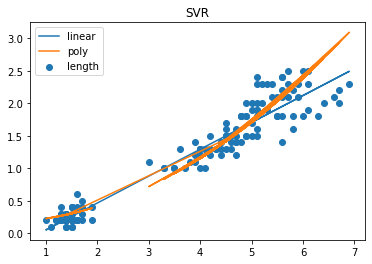

In [91]:
# 시각화 
import matplotlib.pyplot as plt

plt.scatter(iris_df['petal length (cm)'],
           iris_df['petal width (cm)'], label='length')
plt.plot(x_data, svr_linear.predict(x_data), label='linear')
plt.plot(x_data, svr_poly.predict(x_data), label='poly')
plt.title('SVR')
plt.legend()
plt.show()